# La matriz Laplaciana


Se genera una red de las 30 empresas con mayor capitalizacion de mercado que cotizan en el S&P500.

- **Nodos**: 30 tickers con mayor market cap del S&P 500.
- **Aristas dirigidas**: $u\to v$ significa “$u$ provee a $v$”.


In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from typing import List, Tuple

V: List[str] = [
    "AAPL", "MSFT", "NVDA", "AMZN", "GOOGL", "GOOG", "AVGO", "META", "TSLA", "BRK.B",
    "JPM", "V", "MA", "WMT", "COST", "ORCL", "LLY", "XOM", "JNJ", "PLTR",
    "BAC", "ABBV", "MU", "HD", "NFLX", "AMD", "PG", "GE", "CVX", "UNH"
]

E: List[Tuple[str, str]] = [
    # semiconductores / hardware / computo
    ("MU", "NVDA"),
    ("AVGO", "AAPL"),

    ("NVDA", "MSFT"), ("NVDA", "AMZN"), ("NVDA", "GOOG"), ("NVDA", "GOOGL"),
    ("NVDA", "ORCL"), ("NVDA", "META"), ("NVDA", "TSLA"),

    ("AMD", "AMZN"), ("AMD", "MSFT"), ("AMD", "ORCL"), ("AMD", "TSLA"),

    # nube / servicios
    ("AMZN", "NFLX"),
    ("AMZN", "XOM"), ("AMZN", "JNJ"), ("AMZN", "ABBV"),
    ("AMZN", "PLTR"),

    ("MSFT", "CVX"), ("MSFT", "GE"), ("MSFT", "UNH"),
    ("MSFT", "PLTR"),

    ("GOOGL", "PLTR"),
    ("ORCL", "PLTR"),

    # retail
    ("AAPL", "WMT"), ("AAPL", "COST"),
    ("PG", "WMT"),
    ("BRK.B", "WMT"),

    # pagos / tarjetas
    ("V", "COST"), ("V", "HD"), ("V", "BAC"),
    ("MA", "HD"), ("MA", "WMT"), ("MA", "AAPL"), ("MA", "BAC"),
    ("JPM", "AAPL"),

    # farmacia
    ("LLY", "AMZN"),
]


In [5]:
G = nx.DiGraph()
G.add_nodes_from(V)
G.add_edges_from(E)

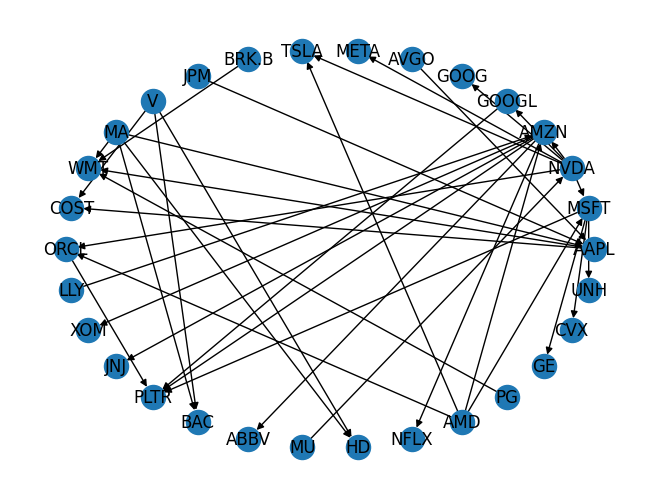

In [14]:
layout = nx.circular_layout(G)
nx.draw(G, layout, with_labels=True)

In [6]:
n = len(G.nodes())
m = len(G.edges())
print("hay ", n, " nodos y ", m, " aristas")

hay  30  nodos y  37  aristas


In [11]:
deg = dict(G.degree())

max_deg_node = max(deg, key=lambda u: (deg[u], str(u)))
min_deg_node = min(deg, key=lambda u: (deg[u], str(u)))
print('el que tiene max deg es ', max_deg_node, 'el que tiene min deg es ', min_deg_node)

el que tiene max deg es  NVDA el que tiene min deg es  ABBV


In [12]:
degree_list = sorted(deg.items(), key=lambda kv: (-kv[1], str(kv[0])))
[print(asset) for asset in degree_list]

('AMZN', 8)
('NVDA', 8)
('MSFT', 6)
('AAPL', 5)
('AMD', 4)
('MA', 4)
('PLTR', 4)
('WMT', 4)
('ORCL', 3)
('V', 3)
('BAC', 2)
('COST', 2)
('GOOGL', 2)
('HD', 2)
('TSLA', 2)
('ABBV', 1)
('AVGO', 1)
('BRK.B', 1)
('CVX', 1)
('GE', 1)
('GOOG', 1)
('JNJ', 1)
('JPM', 1)
('LLY', 1)
('META', 1)
('MU', 1)
('NFLX', 1)
('PG', 1)
('UNH', 1)
('XOM', 1)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [15]:
avg_degree = float(np.mean(list(deg.values())))
print('el avg deg es', avg_degree)

el avg deg es 2.466666666666667


En la lista de las 30 empresas mas grandes del S&P500 estan conectadas a otras 2.46 empresas de la lista 

In [5]:
density = nx.density(G)
density

0.04252873563218391

Es muy dispersa, solo el 4% de todas las posibles conexiones se hicieron

In [6]:
num_wcc = nx.number_weakly_connected_components(G)
num_scc = nx.number_strongly_connected_components(G)
print(num_scc, num_wcc)

30 2


Como las componentes debilmente conexas son 30, la red no tiene ciclos. Si ignoramos la direccion, hay 2 componentes en la red

In [21]:
UG = G.to_undirected(as_view=False)

components = list(nx.connected_components(UG))
num_components = len(components)
print(components)
print(num_components)

[{'PG', 'BAC', 'V', 'COST', 'JPM', 'MA', 'HD', 'WMT', 'AVGO', 'AAPL', 'BRK.B'}, {'CVX', 'GOOG', 'MU', 'AMD', 'ORCL', 'AMZN', 'ABBV', 'META', 'PLTR', 'NVDA', 'GOOGL', 'GE', 'JNJ', 'MSFT', 'TSLA', 'XOM', 'NFLX', 'LLY', 'UNH'}]
2


In [8]:
nx.has_path(UG, max_deg_node, min_deg_node)

True

Hay un camino de NVDA a ABBV

In [9]:
dist_max_min = nx.shortest_path_length(UG, max_deg_node, min_deg_node)
path_max_min = nx.shortest_path(UG, max_deg_node, min_deg_node)
print(dist_max_min, path_max_min)

2 ['NVDA', 'AMZN', 'ABBV']


NVDA le vende a AMZN computo y AMZN le vende a ABBV servicios en la nube

In [10]:
diameters = {}
for i, comp in enumerate(components, start=1):
    H = UG.subgraph(comp).copy()
    diameters[i] = nx.diameter(H)
diameters

{1: 4, 2: 4}

En las dos componentes, el diametro (la trayectoria mas grande) de cada una es de 4

In [11]:
edge_conn = nx.edge_connectivity(UG, max_deg_node, min_deg_node)
node_conn = nx.node_connectivity(UG, max_deg_node, min_deg_node)
min_node_cut_pair = nx.minimum_node_cut(UG, max_deg_node, min_deg_node)
print(edge_conn, node_conn, min_node_cut_pair)

1 1 {'AMZN'}


Hay una arista <- Hay un nodo que al quitarlo se desconecta NVDA y ABBV; es AMZN

In [12]:
L1 = nx.laplacian_matrix(G)
eigenvalores, eigenvectores = np.linalg.eig(L1.toarray())
np.sort(eigenvalores)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 3., 4., 4., 4., 5., 7.])

In [27]:
len(eigenvalores) - np.count_nonzero(eigenvalores)

np.int64(15)

Hay 15 ceros, porque son nodos sin salidas, se puede entender que en la red muchos son compradores finales, esto es porque no habia ciclos en la red. 

In [ ]:
eigenvectores

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.54700196e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.53489700e-01,
         3.64979439e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.88178420e-16,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [ ]:
eigenvals = nx.laplacian_spectrum(G)
eigenvals = np.where(np.isclose(eigenvals, 0.0, atol=1e-10), 0.0, eigenvals)
eigenvals = np.array([0.0 if x < 0 else float(x) for x in eigenvals])
np.sort(eigenvals)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.70084284, 0.80404863, 0.83134755, 1.        ,
       1.        , 1.        , 1.61803399, 2.57199327, 3.        ,
       3.04311866, 4.4772479 , 4.51413693, 5.98962846, 7.475667  ])